# 输入原始数据

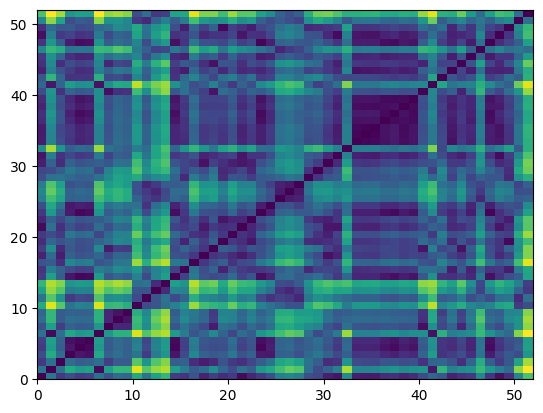

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
num = 52 ## 52个地点

## 输入坐标
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],
                        [945.0,685.0],[845.0,655.0],[880.0,660.0],
                        [25.0,230.0],[525.0,1000.0],[580.0,1175.0],
                        [650.0,1130.0],[1605.0,620.0],[1220.0,580.0],
                        [1465.0,200.0],[1530.0,  5.0],[845.0,680.0],
                        [725.0,370.0],[145.0,665.0],[415.0,635.0],
                        [510.0,875.0],[560.0,365.0],[300.0,465.0],
                        [520.0,585.0],[480.0,415.0],[835.0,625.0],
                        [975.0,580.0],[1215.0,245.0],[1320.0,315.0],
                        [1250.0,400.0],[660.0,180.0],[410.0,250.0],
                        [420.0,555.0],[575.0,665.0],[1150.0,1160.0],
                        [700.0,580.0],[685.0,595.0],[685.0,610.0],
                        [770.0,610.0],[795.0,645.0],[720.0,635.0],
                        [760.0,650.0],[475.0,960.0],[95.0,260.0],
                        [875.0,920.0],[700.0,500.0],[555.0,815.0],
                        [830.0,485.0],[1170.0, 65.0],[830.0,610.0],
                        [605.0,625.0],[595.0,360.0],[1340.0,725.0],
                        [1740.0,245.0]])

# 计算得到52*52的距离矩阵
distmat = np.zeros((num,num)) #52X52距离矩阵
for i in range(num):
    for j in range(i,num):
        distmat[i][j] = distmat[j][i]=np.linalg.norm(coordinates[i]-coordinates[j])
plt.pcolor(distmat)

# 蒙特卡洛模拟

In [3]:
from tqdm import tqdm_notebook as tqdm
N = 1000000      # 重复计算的次数
Dis = []       # 初始化距离记录list
record = []    # 初始化路径记录list
tbar = tqdm(range(N))  # 初始化进度条
for i in tbar:
    a = np.arange(num)
    np.random.shuffle(a) ## 生成随机路径
    D = 0
    for j in range(len(a)-1): ## 计算路径长度并记录
        D = D + distmat[a[j]][a[j+1]]
    Dis.append(D)
    record.append(a)  
minDis = np.min(Dis) ## 找出最短路径
print('最短距离：',minDis)
minDisPath = record[np.where(Dis==minDis)[0][0]]
print('对应路径',minDisPath)

/var/folders/z7/t3wl438j6sd3t533g5l71tjw0000gn/T/ipykernel_95995/1305436430.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tbar = tqdm(range(N))  # 初始化进度条


  0%|          | 0/1000000 [00:00<?, ?it/s]

最短距离： 21011.09407744524
对应路径 [28 16 33 44 47 15 30 31 41 20 23 48 49 35  3 39  5 21 29 24  4 36 22 38
 19 46  0 17 40 18 45 27 25 42  9  2  1  6  8  7 34 26 14 10 11 50 37 43
 12 13 51 32]


In [4]:
# 定义一个计算路径的函数，简化后续代码
def calculate_path_distance(path):
    D = 0
    for j in range(len(path)-1): ## 计算路径长度并记录
        D = D + distmat[path[j]][path[j+1]]
    D = D + distmat[path[0]][path[-1]]
    return D

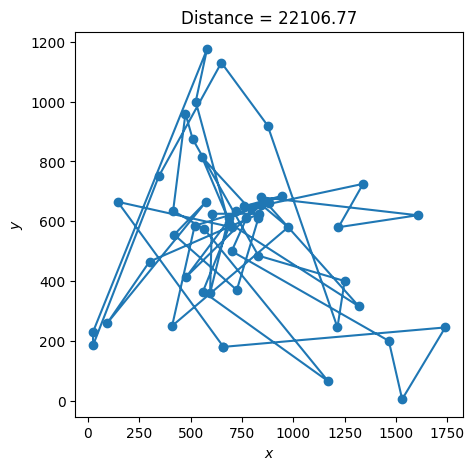

In [5]:
## 定义一个画图函数，给出路径后画图
def plot_path(path):
    x = [] # x坐标
    y = [] # y坐标
    for i in range(len(path)-1):
        x.append(coordinates[path[i]][0])
        y.append(coordinates[path[i]][1])
    x.append(coordinates[path[0]][0])
    y.append(coordinates[path[0]][1])
    plt.figure(figsize = (5,5))
    plt.plot(x,y,'-o') # 画折线图
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    D = calculate_path_distance(path)
    plt.title('Distance = '+'{:.2f}'.format(D))
plot_path(minDisPath)

# 贪心算法

In [6]:
start_loc = 11 # 指定开始点
all_locs = set(np.arange(num))  # 全集
path = []  # 初始化路径
path.append(start_loc)
unreached = all_locs - set(path) # 未达节点

while len(path)< num: # 如还有未达节点
    minDis = 10**9
    next_loc = None
    for loc in unreached: # 寻找最近的一个，加入到当前路径
        if distmat[loc][path[-1]] < minDis:
            minDis = distmat[loc][path[-1]]
            next_loc = loc 
    path.append(next_loc)  # 更新路径
    unreached = all_locs - set(path)   # 更新未达节点

9463.26949053568


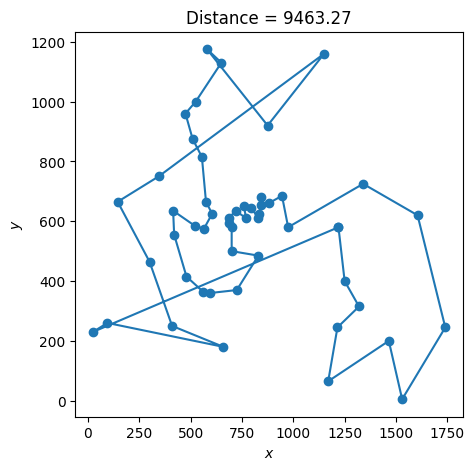

In [7]:
D = calculate_path_distance(path)
print(D)
plot_path(path)

# 改良圈算法

In [8]:
path = np.arange(num)
np.random.seed(1)
np.random.shuffle(path) ## 生成初始随机路径
minDisRecord = [10**9]
minDis = calculate_path_distance(path)
record = [minDis]
while True:
    for i in range(1,len(path)-2): ## 进行改良圈操作
        for j in range(i+1,len(path)-1):
            if (distmat[path[i]][path[j]] + distmat[path[i+1]][path[j+1]]) < (distmat[path[i]][path[i+1]] + distmat[path[j]][path[j+1]]):
                newpath = list(path[0:i+1]) + list(path[j:i:-1]) + list(path[j+1:])
                path = newpath
    record.append(calculate_path_distance(path))
    if record[-1] - record[-2] == 0:  # 如果最优值不再变化
        break           

8911.358607340577


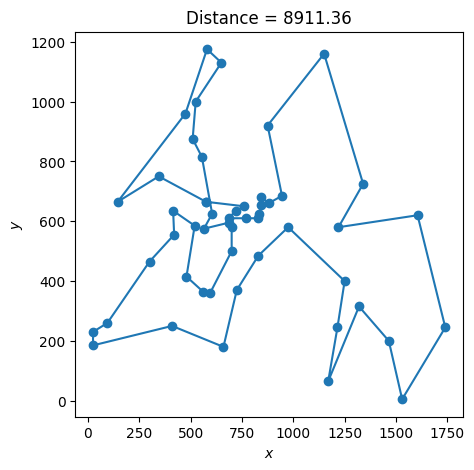

In [9]:
D = calculate_path_distance(path)
print(D)
plot_path(path)

# 模拟退火算法

In [10]:
solutionnew = np.arange(num)

alpha = 0.99
t2 = (1,100)
markovlen = 800

num = coordinates.shape[0]
 
solutioncurrent = solutionnew.copy()
valuecurrent =10**9  #np.max这样的源代码可能同样是因为版本问题被当做函数不能正确使用，应取一个较大值作为初始值
#print(valuecurrent)
solutionbest = solutionnew.copy()
valuebest = 10**9 #np.max

t = t2[1]
result = [] #记录迭代过程中的最优解
while t > t2[0]:
    np.random.seed(2)
    for i in np.arange(markovlen):
 
        #下面的两交换和三交换是两种扰动方式，用于产生新解
        if np.random.rand() > 0.5:# 交换路径中的这2个节点的顺序
            # np.random.rand()产生[0, 1)区间的均匀随机数
            while True:#产生两个不同的随机数
                loc1 = int(np.ceil(np.random.rand()*(num-1)))
                loc2 = int(np.ceil(np.random.rand()*(num-1)))
                ## print(loc1,loc2)
                if loc1 != loc2:
                    break
            solutionnew[loc1],solutionnew[loc2] = solutionnew[loc2],solutionnew[loc1]
        else: #三交换
            while True:
                loc1 = int(np.ceil(np.random.rand()*(num-1)))
                loc2 = int(np.ceil(np.random.rand()*(num-1))) 
                loc3 = int(np.ceil(np.random.rand()*(num-1)))
                if((loc1 != loc2)&(loc2 != loc3)&(loc1 != loc3)):
                    break
 
            # 下面的三个判断语句使得loc1<loc2<loc3
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
            if loc2 > loc3:
                loc2,loc3 = loc3,loc2
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
 
            #下面的三行代码将[loc1,loc2)区间的数据插入到loc3之后
            tmplist = solutionnew[loc1:loc2].copy()
            solutionnew[loc1:loc3-loc2+1+loc1] = solutionnew[loc2:loc3+1].copy()
            solutionnew[loc3-loc2+1+loc1:loc3+1] = tmplist.copy()  
 
        valuenew = 0
        for i in range(num-1):
            valuenew += distmat[solutionnew[i]][solutionnew[i+1]]
        valuenew += distmat[solutionnew[0]][solutionnew[51]]
       # print (valuenew)
        if valuenew<valuecurrent: #接受该解
            #更新solutioncurrent 和solutionbest
            valuecurrent = valuenew
            solutioncurrent = solutionnew.copy()
 
            if valuenew < valuebest:
                valuebest = valuenew
                solutionbest = solutionnew.copy()
        else:#按一定的概率接受该解
            if np.random.rand() < np.exp(-(valuenew-valuecurrent)/t):
                valuecurrent = valuenew
                solutioncurrent = solutionnew.copy()
            else:
                solutionnew = solutioncurrent.copy()
    t = alpha*t
    result.append(valuebest)
    # print (t) #程序运行时间较长，打印t来监视程序进展速度


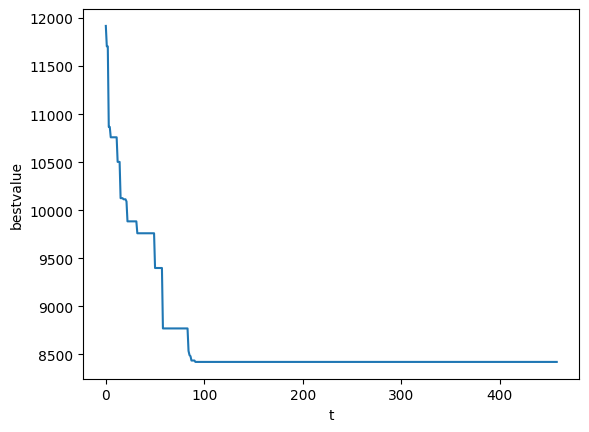

In [11]:
#用来显示结果
plt.plot(np.array(result))
plt.ylabel("bestvalue")
plt.xlabel("t")
plt.show()

8419.774895056102


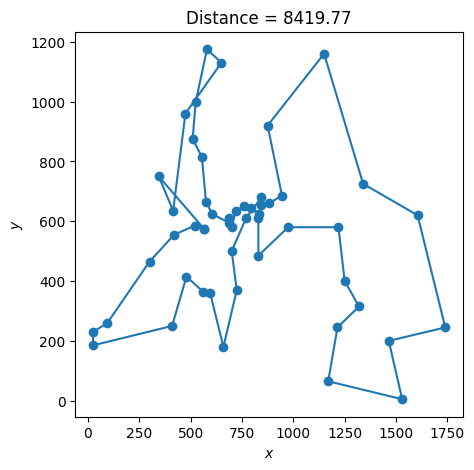

In [12]:
D = calculate_path_distance(solutionbest)
print(D)
plot_path(solutionbest)

# 遗传算法

In [13]:
def initialize_population(size):
    ## 随机产生种群（浮点数编码）
    population = np.random.rand(size,num)
    return population

In [14]:
def decode(x):
    ## 根据基因型，解码为tsp路径
    path = sorted(range(len(x)), key=lambda k:x[k])
    return path

In [15]:
def selection(population,top_no):
    ## 选在前top_no个fitness的个体
    fitness = []
    for i in range(len(population)):
        fitness.append(calculate_path_distance(decode(population[i])))
    best_fitness = np.min(fitness)
    index_increasing = sorted(range(len(fitness)), key=lambda k:fitness[k])
    new_population = population[index_increasing[0:top_no]] ## 筛选出前 top_no 个 
    return new_population,best_fitness

In [16]:
def mutate1(dna):
    ## 生成新的突变个体
    step = 0.5 ## 突变最大步长
    loc = np.random.randint(len(dna))
    delta = step * (np.random.rand()-0.5)
    if dna[loc] + delta >= 1:
        dna[loc] = 1
    elif dna[loc] + delta <= 0:
        dna[loc] = 0
    else:
        dna[loc] = dna[loc] + delta
    new_dna = dna.copy()
    return  new_dna

In [17]:
def mutate2(dna):
    ## 生成新的突变个体
    indexes = []
    while len(indexes) < 3:
        x = np.random.randint(low = 1,high = 52-1)
        if x not in indexes:
            indexes.append(x)
    indexes.sort()
    u,v,w = indexes[0],indexes[1],indexes[2]
    new_dna = list(dna[0:u])+list(dna[v:w]) + list(dna[u:v])+list(dna[w:])
    return  new_dna

In [18]:
def population_mutate(population):
    K1 = 50 # 增加10个个体
    K2 = 50 # 增加10个个体
    mutations = [] # 初始化存储列表
    for k in range(K1):
        dna_no = np.random.randint(len(population))
        dna = population[dna_no]
        new_dna = list(mutate1(dna))
        mutations.append(new_dna)
    for k in range(K2):
        dna_no = np.random.randint(len(population))
        dna = population[dna_no]
        new_dna = list(mutate2(dna))
        mutations.append(new_dna)
    mutated_population = np.array(mutations)
    return mutated_population

In [19]:
def cross(dna1,dna2):
    ## 交叉
    loc = np.random.randint(len(dna1))
    s1 = list(dna1[0:loc]) + list(dna2[loc:])
    s2 = list(dna2[0:loc]) + list(dna1[loc:])
    return s1,s2

In [20]:
def population_cross(population):
    # 交叉增加50个个体
    crossed_population = []
    shuffled_index = np.arange(len(population))
    np.random.shuffle(shuffled_index)
    for i in range(int(len(population)/2)):
        s1,s2 = cross(population[shuffled_index[2*i]],population[shuffled_index[2*i+1]])
        crossed_population.append(s1)
        crossed_population.append(s2)
    return np.array(crossed_population)

In [21]:
from tqdm.notebook import trange, tqdm
## 引入tqdm 用于监控循环进度

In [22]:
np.random.seed(3)
population_size = 200
population = initialize_population(population_size)
best_fitness_record = []
# for m in range(10000):
for m in tqdm(range(10000)): ## 引入tqdm 用于监控循环进度
    population_after_selection,best_fitness = selection(population,50)     # 选择
    best_fitness_record.append(best_fitness)
    mutations = population_mutate(population_after_selection) # 变异
    crossed = population_cross(population_after_selection)    # 交叉
    population = np.concatenate((population_after_selection,mutations,crossed)) # 更新population
    if m % 500 ==0:
        print('Step',m,'best_fitness=',best_fitness)

  0%|          | 0/10000 [00:00<?, ?it/s]

Step 0 best_fitness= 26050.231717624236
Step 500 best_fitness= 11490.48566881009
Step 1000 best_fitness= 11314.697676559517
Step 1500 best_fitness= 11443.467315315334
Step 2000 best_fitness= 11324.518224312773
Step 2500 best_fitness= 10951.38249341762
Step 3000 best_fitness= 10876.583819094583
Step 3500 best_fitness= 10810.976526388013
Step 4000 best_fitness= 10740.931158466112
Step 4500 best_fitness= 10501.821648445522
Step 5000 best_fitness= 10299.176840288494
Step 5500 best_fitness= 10330.150388207836
Step 6000 best_fitness= 9996.288604526517
Step 6500 best_fitness= 10077.501471784382
Step 7000 best_fitness= 10094.120554618445
Step 7500 best_fitness= 10109.579060337996
Step 8000 best_fitness= 10119.556743415584
Step 8500 best_fitness= 10091.36944711372
Step 9000 best_fitness= 10163.916143225395
Step 9500 best_fitness= 10217.08895702685


9487.746807655925


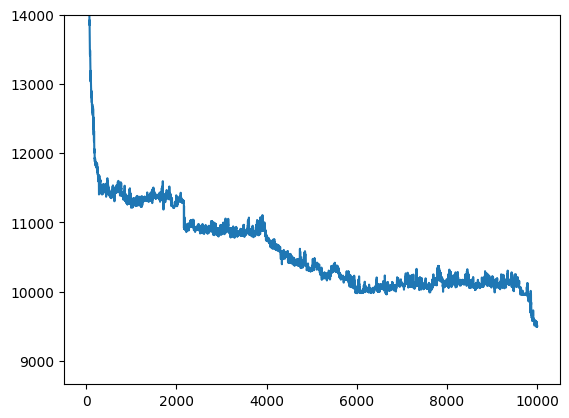

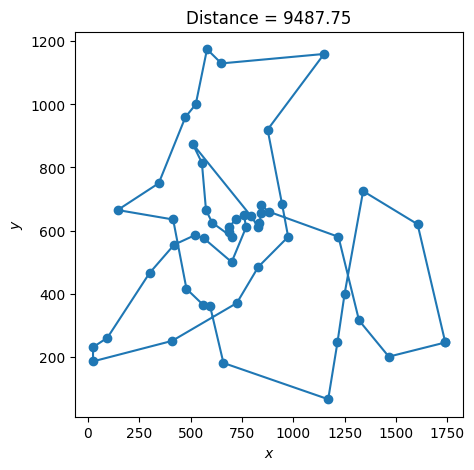

In [23]:
plt.plot(best_fitness_record)
plt.ylim(top=14000)
## 画结果图
fitness = []
for i in range(len(population)):
    fitness.append(calculate_path_distance(decode(population[i])))
path = decode(population[np.where(fitness == np.min(fitness))[0][0]])
D = calculate_path_distance(path)
print(D)
plot_path(path)